## Week 1 Day 3 Assignment
#*25DLS037_AKSHIT_SHARMA*

#P-1 Data Preparation

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [23]:
iris = load_iris()

In [24]:
features = iris.data
labels = iris.target.reshape(-1, 1)

In [25]:
encoder = OneHotEncoder(sparse_output=False)
labels_encoded = encoder.fit_transform(labels)

In [26]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels_encoded, test_size=0.2, random_state=42
)

In [28]:
print("Train Feature Shape:", X_train.shape)
print("Test Feature Shape:", X_test.shape)
print("Train Label Shape:", y_train.shape)
print("Test Label Shape:", y_test.shape)

Train Feature Shape: (120, 4)
Test Feature Shape: (30, 4)
Train Label Shape: (120, 3)
Test Label Shape: (30, 3)


#P-2 activation function

In [29]:

def get_activation_funcs(name):
    if name == "sigmoid":
        return lambda x: 1 / (1 + np.exp(-x)), lambda x: x * (1 - x)
    elif name == "tanh":
        return np.tanh, lambda x: 1 - x**2
    elif name == "relu":
        return lambda x: np.maximum(0, x), lambda x: np.where(x > 0, 1, 0)
    elif name == "leaky_relu":
        return lambda x: np.maximum(0.01 * x, x), lambda x: np.where(x > 0, 1, 0.01)
    else:
        raise ValueError("Unsupported activation name")

In [30]:
test_input = np.array([[0, 1, -1]])
sigmoid, _ = get_activation_funcs("sigmoid")
relu, _ = get_activation_funcs("relu")

In [31]:

print("Sigmoid Result:", sigmoid(test_input))
print("ReLU Result:", relu(test_input))

Sigmoid Result: [[0.5        0.73105858 0.26894142]]
ReLU Result: [[0 1 0]]


#P-3 Train the MLP Model

In [32]:
input_dim = X_train.shape[1]
hidden_dim = 8
output_dim = y_train.shape[1]
learning_rate = 0.1
epochs = 1000

In [33]:
def softmax(x):
    x_exp = np.exp(x - np.max(x, axis=1, keepdims=True))
    return x_exp / np.sum(x_exp, axis=1, keepdims=True)

def cross_entropy(true, pred):
    return -np.mean(np.sum(true * np.log(pred + 1e-8), axis=1))

def accuracy_score(true, pred):
    return np.mean(np.argmax(true, axis=1) == np.argmax(pred, axis=1))

In [34]:
def train_model(activation_name):
    activate, activate_deriv = get_activation_funcs(activation_name)

    np.random.seed(1)
    W1 = np.random.randn(input_dim, hidden_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim)
    b2 = np.zeros((1, output_dim))

    losses = []
    for _ in range(epochs):
        # Forward pass
        Z1 = np.dot(X_train, W1) + b1
        A1 = activate(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = softmax(Z2)

        # Compute loss
        loss = cross_entropy(y_train, A2)
        losses.append(loss)

        # Backpropagation
        dZ2 = A2 - y_train
        dW2 = A1.T @ dZ2
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = dZ2 @ W2.T
        dZ1 = dA1 * activate_deriv(A1)
        dW1 = X_train.T @ dZ1
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        # Update weights
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * b2

    def predict(X):
        A1 = activate(np.dot(X, W1) + b1)
        A2 = softmax(np.dot(A1, W2) + b2)
        return A2

    acc = accuracy_score(y_test, predict(X_test))
    return losses, acc, predict

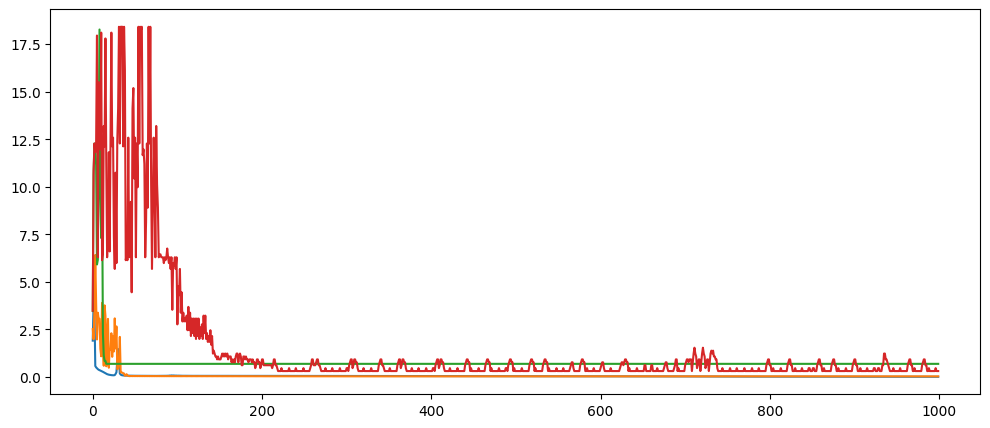

In [35]:
activation_list = ["sigmoid", "tanh", "relu", "leaky_relu"]
final_accuracies = {}
predictor_dict = {}

plt.figure(figsize=(12, 5))

for act in activation_list:
    loss_curve, acc, pred_func = train_model(act)
    final_accuracies[act] = acc
    predictor_dict[act] = pred_func
    plt.plot(loss_curve, label=f"{act} (acc={acc:.2f})")

<ipython-input-36-c07b5900833f>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


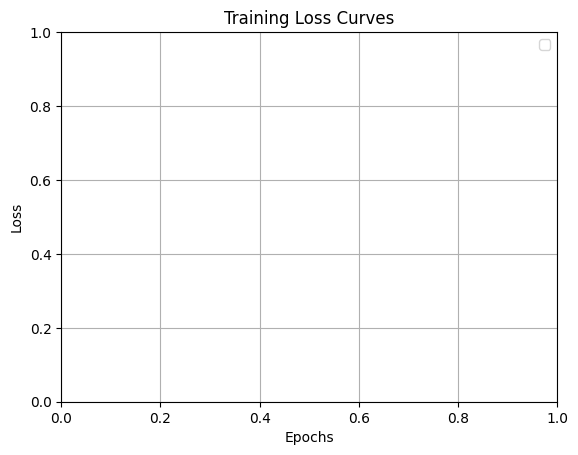

In [36]:
plt.title("Training Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# P-4. Accuracy Report

In [37]:
print("Accuracies:")
for key, val in final_accuracies.items():
    print(f"{key}: {val:.4f}")

Accuracies:
sigmoid: 0.9333
tanh: 0.9667
relu: 0.3667
leaky_relu: 1.0000


# P-5. New Sample Prediction

In [38]:
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])
new_sample_scaled = scaler.transform(new_sample)

In [39]:
best_act = max(final_accuracies, key=final_accuracies.get)
predicted_probs = predictor_dict[best_act](new_sample_scaled)
predicted_class = np.argmax(predicted_probs)

In [40]:
print(f"\nPredicted class for sample {new_sample.flatten().tolist()}: {predicted_class}")


Predicted class for sample [5.1, 3.5, 1.4, 0.2]: 0
